In [1]:
import numpy as np
import pandas as pd
import utils

In [2]:
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram,distance 

In [108]:
from matplotlib import pyplot as plt
from matplotlib import cm
from IPython.core.pylabtools import figsize
%matplotlib widget

In [4]:
from PATH import data_path

In [297]:
pds = utils.read_leukocyte(data_path)
#pds = read_leukocyte(data_path,True)
v_data = pds.iloc[:,1:].values

In [6]:
pds.shape

(3149, 23)

## statistics

In [7]:
statistics = pds.describe(percentiles=[0.25,0.5,0.75,0.95])

In [9]:
data = statistics.values[1:,:]

In [10]:
from matplotlib.ticker import StrMethodFormatter
valfmt = StrMethodFormatter('{x:.3f}')

/home/ZwZ/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


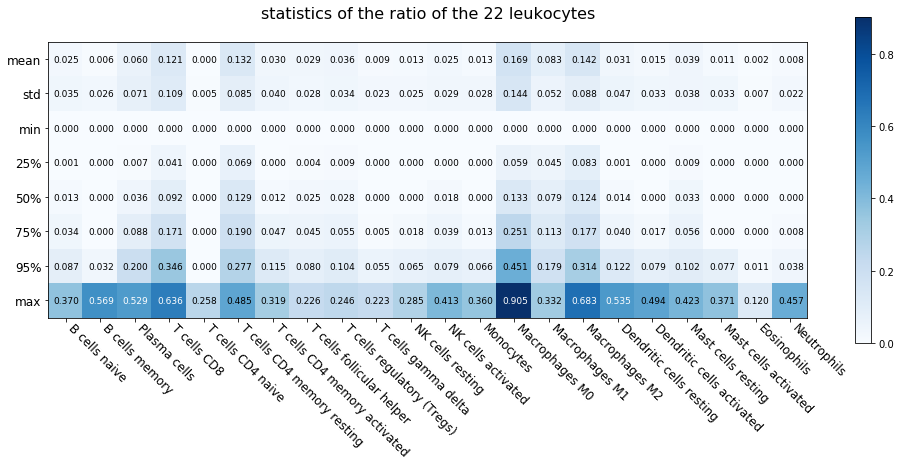

In [100]:
%matplotlib inline

data = statistics.values[1:,:]
fig,ax = plt.subplots(figsize=(17,10))

im = ax.imshow(data,cmap=cm.Blues);
cbar = ax.figure.colorbar(im,shrink=0.6);

ax.set_title('statistics of the ratio of the 22 leukocytes\n',size=16)
”
ax.xaxis.set_tick_params(pad=0,rotation=-45) 
ax.yaxis.set_ticks(range(0,8));
ax.set_yticklabels(statistics.index[1:],size=12)
ax.xaxis.set_ticks(range(0,22));
ax.set_xticklabels(statistics.columns,ha='left',size=12);

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        font_color = ['black','w'][(data[i,j] > 0.5)]
        ax.text(j-0.35,i+0.08,valfmt(data[i,j],None),color=font_color,size=9)

In [13]:
v_data = np.array(pds.values[:,1:],dtype=np.float32)
v_data = v_data - np.mean(v_data,axis=0)

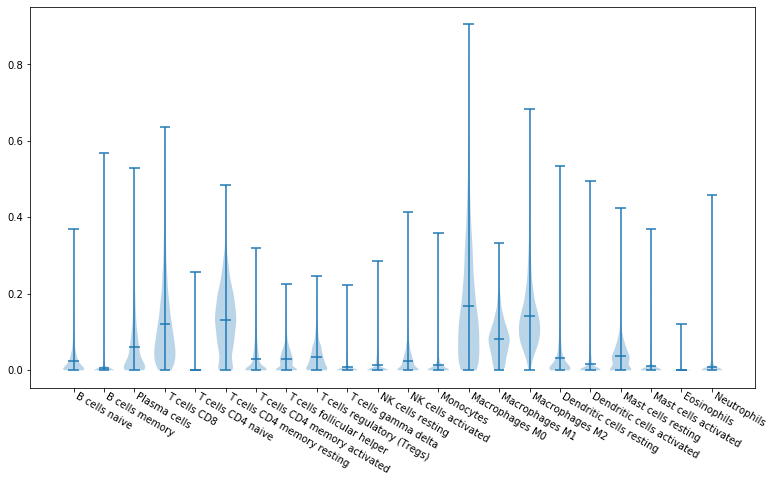

In [16]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(13,7))
violin = ax.violinplot(v_data,showmeans=True,widths=0.7,showextrema=True,)

ax.xaxis.set_tick_params(pad=0,rotation=-30) 
ax.xaxis.set_ticks(range(1,23));
ax.set_xticklabels(statistics.columns,ha='left',size=10);

## data filtering

In [18]:
columns = list(pds.columns)

In [48]:
from matplotlib_venn import venn3

### 'B cells memory', 'T cells CD4 naive', 'Eosinophils'

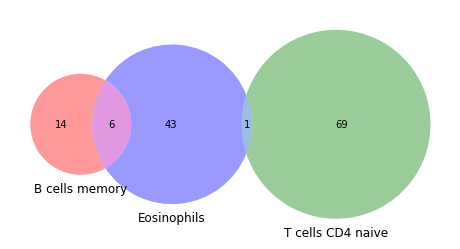

In [57]:
plt.figure(figsize=(8,6));

# element inside is set 
subsets=np.array([set(np.where(pds[columns[5]] != 0)[0]),
                  set(np.where(pds[columns[-2]] > 0.02)[0]),
                  set(np.where(pds[columns[2]] > 0.1)[0])])
# venn3 not venn2
venn3(subsets=subsets,set_labels=(columns[2],columns[5],columns[-2]));

## try all leukocyte 
find out sample that are outside 95% 

In [91]:
threshold = statistics.loc['95%'].values
gtr_sum = np.sum(v_data > threshold,axis=1)

In [109]:
%matplotlib widget

plt.bar(range(v_data.shape[0]),gtr_sum);
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [95]:
np.bincount(gtr_sum)

array([ 961, 1303,  653,  201,   29,    2])

<font size=6 color='darkred'><center> **will drop data where ```gtr_sum```<4**    </font>

In [299]:
v_data.shape

(3149, 22)

In [298]:
v_data = v_data[gtr_sum <4,statistics.loc['std',:] >= 0.05]

from sklearn.preprocessing import normalize
n_data = normalize(v_data,axis=0)

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (3118,) (6,) 

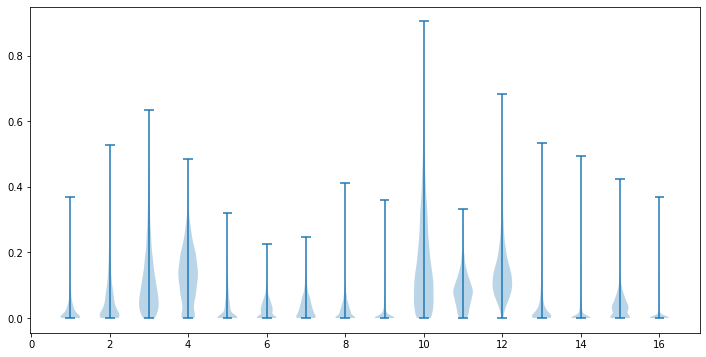

In [295]:
plt.figure(figsize=(12,6))
plt.violinplot(v_data);

# decomposition

## TSNE

drop out group data

In [288]:
tsne_datas = [TSNE(perplexity=perplexity,n_jobs=8,n_iter=8000).fit_transform(v_data) 
              for perplexity in [5,10,15,20,25,30,35,40,45]]

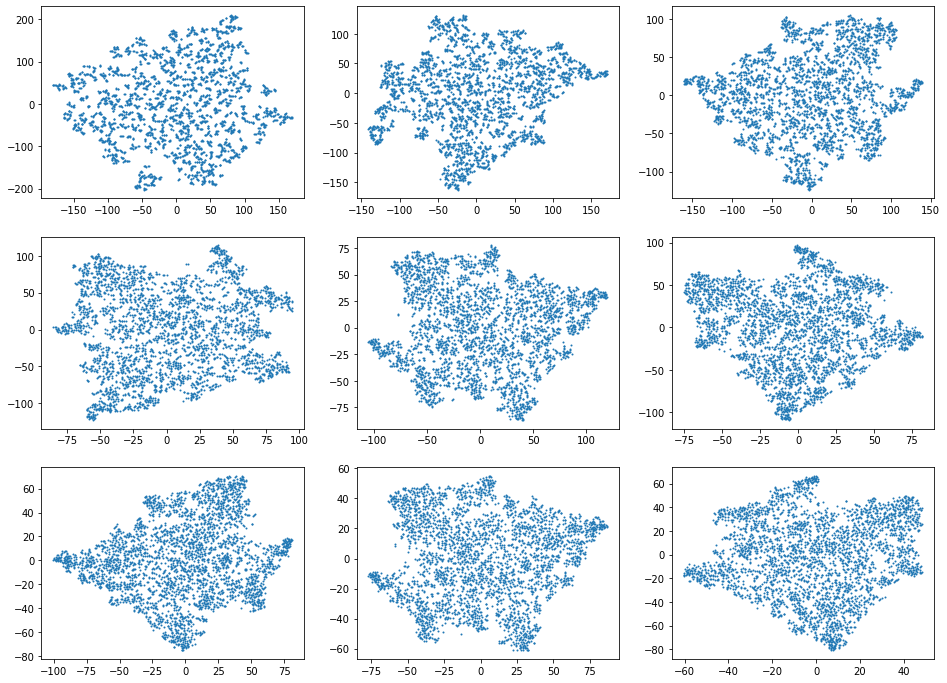

In [289]:
fig = plt.figure(figsize=(16,12))
ax = fig.subplots(3,3)
i = 0
for k in range(3):
    for j in range(3):
        ax[k,j].scatter(tsne_datas[i][:,0],tsne_datas[i][:,1],s=1)
        i += 1

and further normalize

In [290]:
tsne_datas_n = [TSNE(perplexity=perplexity,n_jobs=8,n_iter=8000).fit_transform(n_data) 
              for perplexity in [5,10,15,20,25,30,35,40,45]]

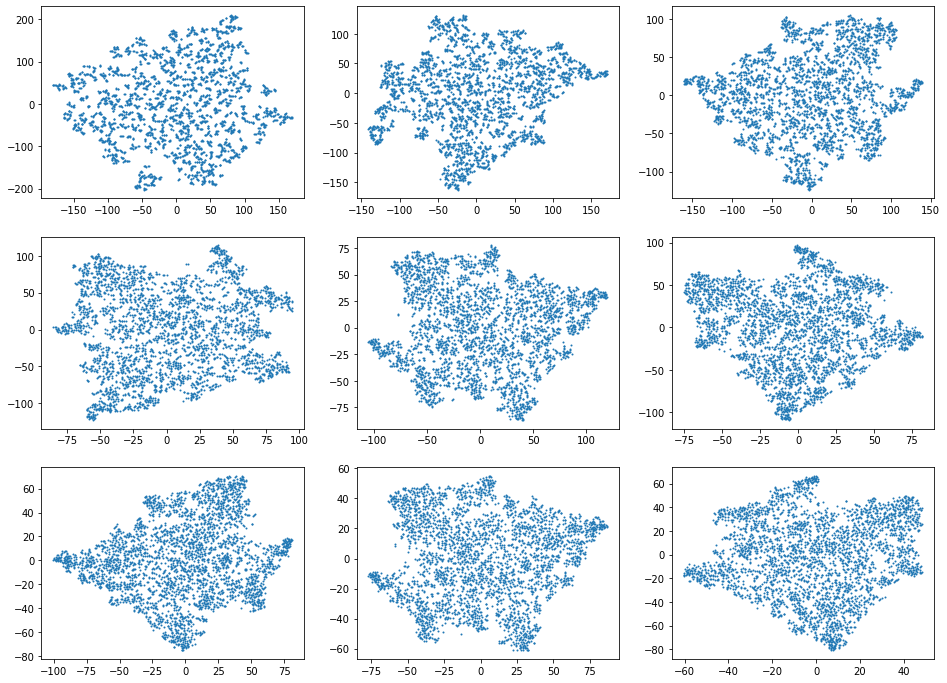

In [291]:
fig = plt.figure(figsize=(16,12))
ax = fig.subplots(3,3)
i = 0
for k in range(3):
    for j in range(3):
        ax[k,j].scatter(tsne_datas[i][:,0],tsne_datas[i][:,1],s=1)
        i += 1

## PCA

In [161]:
from sklearn.decomposition import PCA,KernelPCA

In [164]:
pca_data = PCA(n_components=2).fit_transform(n_data)
rbfpca = KernelPCA(n_components=2,kernel='rbf').fit_transform(n_data)
sigpca = KernelPCA(n_components=2,kernel='sigmoid').fit_transform(n_data)
polypca = KernelPCA(n_components=2,kernel='poly').fit_transform(n_data)

In [165]:
fig,ax = plt.subplots(2,2,figsize=(16,16))
ax[0,0].scatter(pca_data[:,0],pca_data[:,1],s=4);
ax[0,1].scatter(rbfpca[:,0],rbfpca[:,1],s=4);
ax[1,0].scatter(sigpca[:,0],sigpca[:,1],s=4);
ax[1,1].scatter(polypca[:,0],polypca[:,1],s=4);

/home/ZwZ/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# clustering

## Hierarchical Clustering

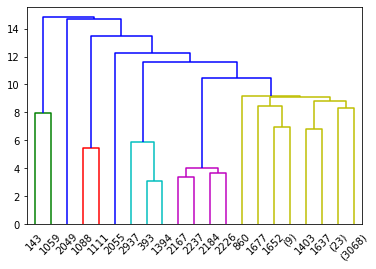

In [370]:
disMat=distance.pdist(n_data,metric='mahalanobis')
Z=linkage(disMat,method='average') 

plt.figure()
tree = dendrogram(Z,p=9,truncate_mode='level')

In [371]:
len(tree['ivl']),len(tree['leaves'])

(21, 21)

In [226]:
t_axises =tsne_datas[2]

##  AgglomerativeClustering

'braycurtis', 'canberra', 'chebyshev', 'cityblock','correlation', 'cosine', 'dice', 'euclidean', 'hamming',
    'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 'matching',
    'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
    'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'

In [233]:
import my_metrics

In [336]:
reload(my_metrics)

<module 'my_metrics' from '/home/ZwZ/script/HER2_prediction/my_metrics.py'>

In [323]:
ac_label_ls = [AgglomerativeClustering(n_clusters=i).fit_predict(n_data) for i in range(5,20)]

In [337]:
ac_metrics = my_metrics.cluster_metrics(n_data,ac_label_ls)

In [431]:
save_labels2DF(ac_label_ls,'Hierarchical.csv')

## K-means

In [170]:
from sklearn.cluster import KMeans

In [325]:
km_label_ls=[KMeans(n_clusters=i,n_jobs=8).fit_predict(n_data) for i in range(5,20)]

In [338]:
km_metrics = my_metrics.cluster_metrics(n_data,km_label_ls)

In [432]:
save_labels2DF(km_label_ls,'K_means.csv')

## GMM

In [167]:
from sklearn.mixture import GaussianMixture as GMM

In [327]:
gmm_label_ls=[GMM(n_components=i,max_iter=400).fit_predict(n_data) for i in  range(5,20)]

In [339]:
gmm_metrics = my_metrics.cluster_metrics(n_data,gmm_label_ls)

In [433]:
save_labels2DF(gmm_label_ls,'GMM_label.csv')

## Mean Shift

In [372]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [399]:
estimate_bandwidth(v_data,quantile=0.3)

0.29741518205130424

<font size=3 color='darkred'> **bandiwidth** largely decide the number of clusters </font>

In [400]:
ms_label=MeanShift(bandwidth=0.2).fit_predict(v_data)

In [401]:
len(np.unique(ms_label))

22

## AP

In [374]:
from sklearn.cluster import AffinityPropagation

In [387]:
ap_label=AffinityPropagation(damping=0.5,preference=None).fit_predict(v_data)

In [388]:
len(np.unique(ap_label))

124

In [378]:
ap_label

array([14, 38,  8, ..., 39, 36, 68])

## plot

No handles with labels found to put in legend.


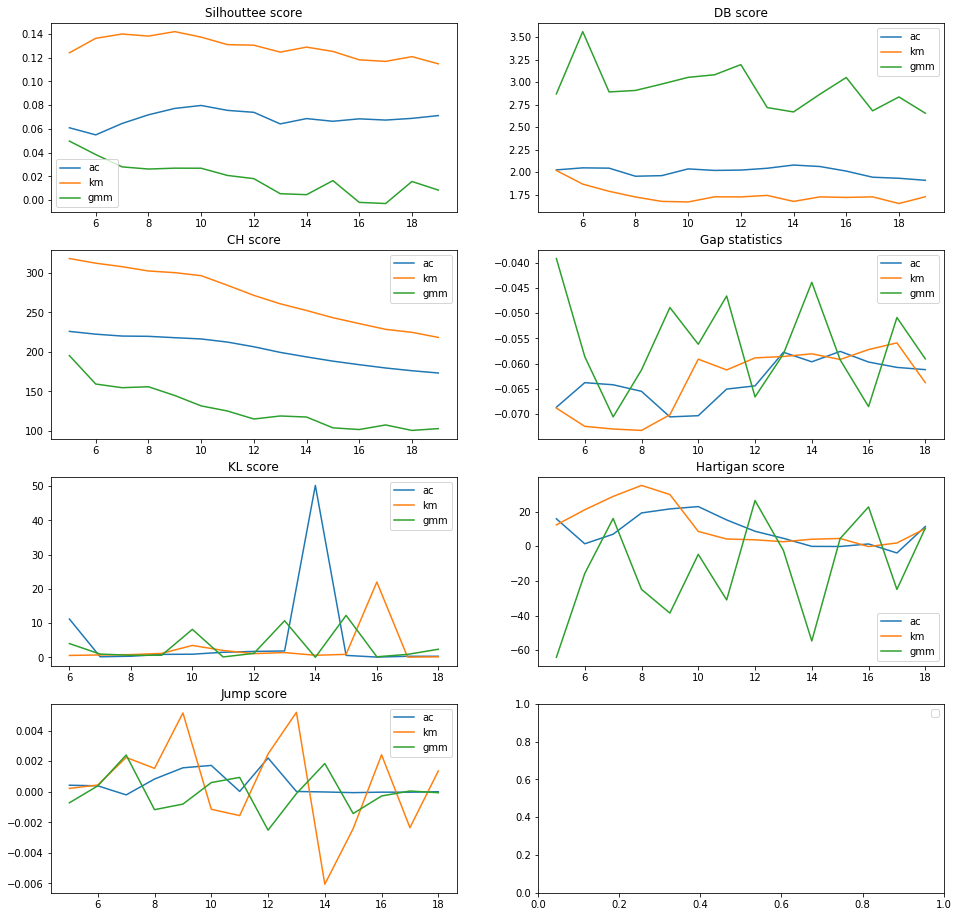

In [340]:
figall = plt.figure(figsize=(16,16))
ax = figall.subplots(4,2)
ac_metrics.all_in_one(fig=figall,ax=ax,**{'label':'ac'})
km_metrics.all_in_one(fig=figall,ax=ax,**{'label':'km'})
gmm_metrics.all_in_one(fig=figall,ax=ax,**{'label':'gmm'})
# ax[0,0].set_xticks(,['5','8','10','12','15','20'])
for ls in ax:
    for axx in ls:
        axx.legend()

In [330]:
from sklearn.metrics import calinski_harabasz_score

In [ ]:
calinski_harabasz_score

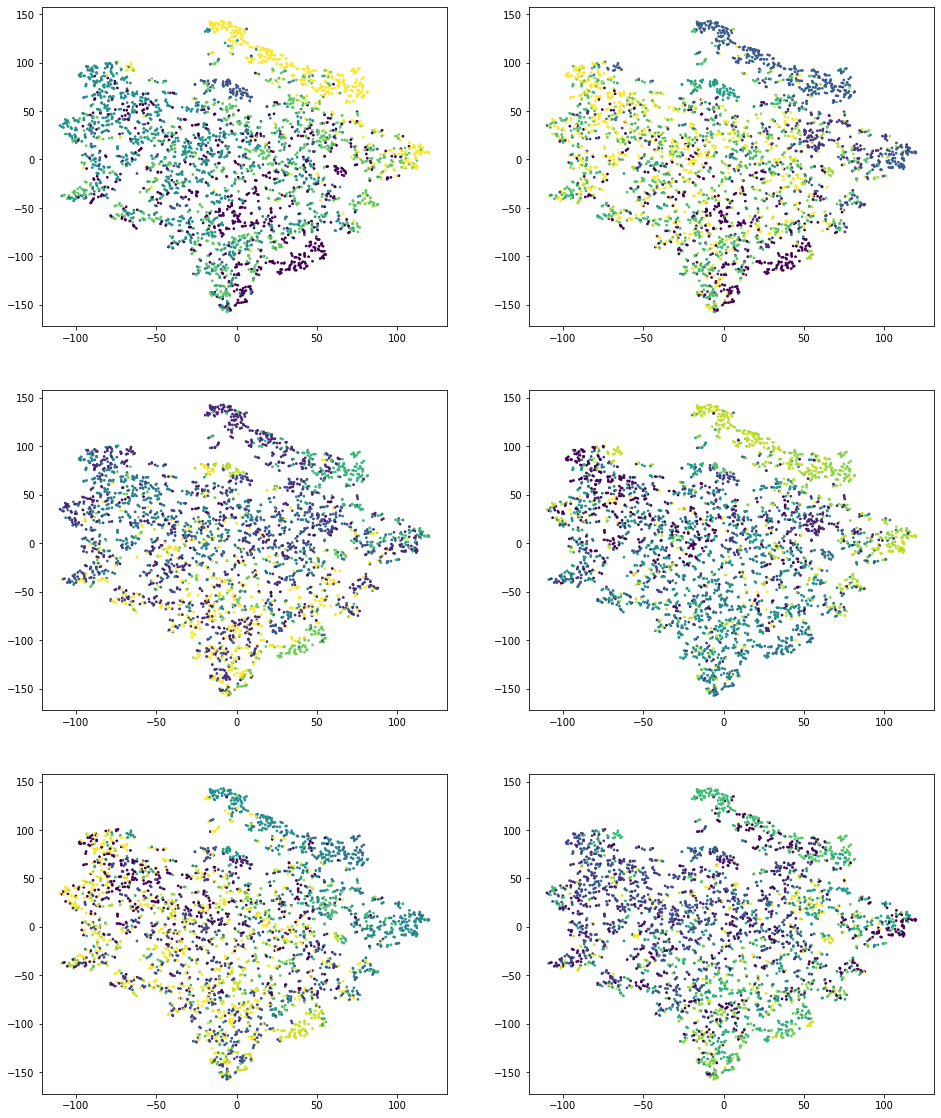

In [227]:
%matplotlib inline
fig = plt.figure(figsize=(16,20))
ax = fig.subplots(3,2)
cluster_iid = 0

for i in range(3):
    for j in range(2):
        ax[i,j].scatter(t_axises[:,0],t_axises[:,1],s=3,c=gmm_label_ls[cluster_iid]);
        cluster_iid += 1